In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [20]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

data = pd.read_csv('../ml_data/housing.data',
                   sep=' +', engine='python', header=None, 
                   names=cols)

In [21]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [23]:
data = data.loc[:,['LSTAT', 'MEDV']]

In [25]:
data.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [32]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [33]:
IQR

LSTAT    9.37
MEDV     7.40
dtype: float64

In [34]:
outlier = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

In [35]:
data = data[~outlier.any(axis=1)]

In [36]:
data.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
5,5.21,28.7


In [38]:
X = data['LSTAT'].values.reshape(-1,1)

In [39]:
y = data['MEDV'].values.reshape(-1,1)

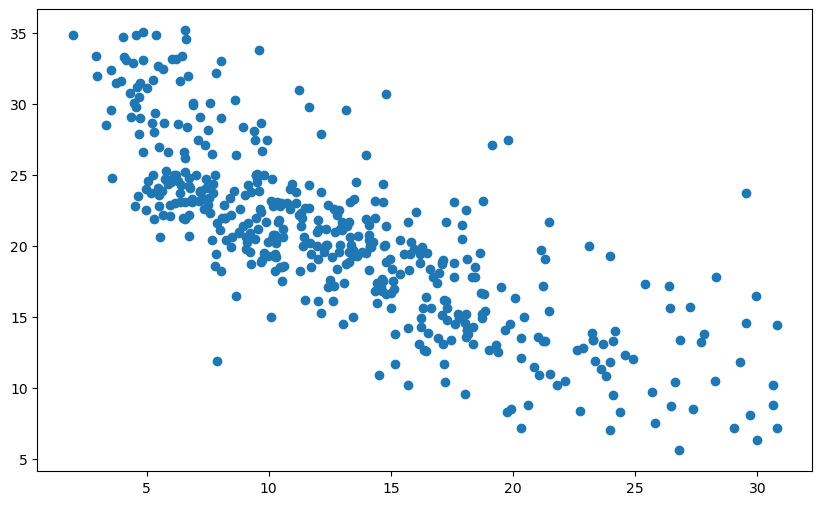

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.show()

In [41]:
scaler = StandardScaler()

In [43]:
scaler.fit(X)

StandardScaler()

In [44]:
X = scaler.transform(X)

In [45]:
scaler.fit(y)

StandardScaler()

In [46]:
y = scaler.transform(y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
mae_train = mean_absolute_error(y_train, lr.predict(X_train))

In [58]:
mae_test = mean_absolute_error(y_test, lr.predict(X_test))

In [60]:
print("MAE TRAIN {}, TEST {}".format(round(mae_train,2), round(mae_test,2)))

MAE TRAIN 0.51, TEST 0.42


In [61]:
mse_train = mean_squared_error(y_train, lr.predict(X_train))
mse_test = mean_squared_error(y_test, lr.predict(X_test))

In [63]:
print("MSE TRAIN {}, TEST {}".format(round(mse_train,2), round(mse_test,2)))

MSE TRAIN 0.41, TEST 0.34


In [64]:
r2_train = r2_score(y_train, lr.predict(X_train))
r2_test = r2_score(y_test, lr.predict(X_test))
print("R2  TRAIN {}, TEST {}".format(round(r2_train,2), round(r2_test,2)))

R2  TRAIN 0.6, TEST 0.65


In [65]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']


In [66]:
data = pd.read_csv('../ml_data/housing.data',
                   sep=' +', engine='python', header=None, 
                   names=cols)

In [67]:
X = data.loc[:, data.columns != 'MEDV']

In [68]:
y = data['MEDV'].values.reshape(-1,1)

In [69]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [71]:
lr = LinearRegression()
lr.fit(X_train, y_train)                

LinearRegression()

In [72]:
mae_train = mean_absolute_error(y_train, lr.predict(X_train))
mae_test = mean_absolute_error(y_test, lr.predict(X_test))
print("MAE TRAIN {}, TEST {}".format(round(mae_train,2), round(mae_test,2)))

MAE TRAIN 3.27, TEST 3.49


In [73]:
mse_train = mean_squared_error(y_train, lr.predict(X_train))
mse_test = mean_squared_error(y_test, lr.predict(X_test))
print("MSE TRAIN {}, TEST {}".format(round(mse_train,2), round(mse_test,2)))

MSE TRAIN 21.57, TEST 23.69


In [74]:
r2_train = r2_score(y_train, lr.predict(X_train))
r2_test = r2_score(y_test, lr.predict(X_test))
print("R2  TRAIN {}, TEST {}".format(round(r2_train,2), round(r2_test,2)))


R2  TRAIN 0.75, TEST 0.7
